In [1152]:
import autograd.numpy as np
from autograd.numpy import log as ln
from autograd.numpy import exp
from autograd import grad
from autograd import elementwise_grad
import math
e = math.e
from numpy import genfromtxt
from numpy import trace
import matplotlib.pyplot as plt

In [1153]:
A = genfromtxt('hw_csv_file/hw_2_A.csv', delimiter=',')
B = genfromtxt('hw_csv_file/hw_2_B.csv', delimiter=',')
C = genfromtxt('hw_csv_file/hw_2_C.csv', delimiter=',')
D = genfromtxt('hw_csv_file/hw_2_D.csv', delimiter=',')
E = genfromtxt('hw_csv_file/hw_2_E.csv', delimiter=',')
x = genfromtxt('hw_csv_file/hw_2_x.csv', delimiter=',').reshape(-1,1)
y = genfromtxt('hw_csv_file/hw_2_y.csv', delimiter=',').reshape(-1,1)
z = genfromtxt('hw_csv_file/hw_2_z.csv', delimiter=',').reshape(-1,1)

Question 1
1) max(⟨A, A⟩)
2) min(⟨A, B⟩)
3) sum(⟨C, D⟩)

4) average((C + D)x)
5) max(⟨C⊤, D⊤⟩x)
6) min(x ⊗ z)

7) (x ⊗ z)
8) sum(A + B − 10)
9) average(A⊤B)

10) E⊤C⊤Dx

In [1154]:
# 1
q_1 = np.max(trace(A.dot(A.T)))
print(q_1)

292.05


In [1155]:
# 2
q_2 = np.min(trace(A.dot(B.T)))
print(q_2)

10.449999999999996


In [1156]:
# 3
q_3 = np.sum([trace(C.dot(D.T))])
print(q_3)

-3.49


In [1157]:
# 4
q_4 = np.average((C + D).dot(x))
print(q_4)

-0.4699999999999998


In [1158]:
# 5
q_5 = np.max(trace(C.T.dot(D.T.T))*x)
print(q_5)

0.349


In [1159]:
# 6
q_6 = np.min(x.dot(z.T))
print(q_6)

-3.7199999999999998


In [1160]:
# 7
q_7 = x.dot(z.T)
print(q_7)

[[-3.72  0.12  0.24]
 [-1.86  0.06  0.12]
 [ 0.    0.    0.  ]
 [ 0.31 -0.01 -0.02]
 [-3.72  0.12  0.24]]


In [1161]:
# 8
q_8 = np.sum(A + B - 10)
print(q_8)

-2987.2000000000003


In [1162]:
# 9
q_9 = np.average(A.T.dot(B))
print(q_9)

-2.7744444444444456


In [1163]:
# 10
q_10 = E.T.dot(C.T).dot(D).dot(x)
print(q_10)

[[ 8.8684]
 [-4.502 ]
 [-3.0041]
 [-5.5886]]


Question 2

[]

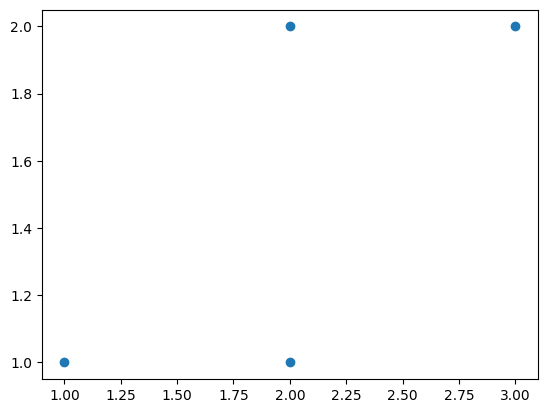

In [1164]:
# 1
Φ = np.array([[1,1],
              [2,1],
              [2,1],
              [3,1]])

n = Φ.shape[0]

y = np.array([[1],
              [1],
              [2],
              [2]])

w = np.array([[0], [1]])

η = 0.1

plt.scatter(Φ[:,0], y)
plt.plot()

In [1165]:
def f(w):
	f0 = 0
	for ϕi, yi in zip(Φ,y):
		f0 += (w.T.dot(np.reshape(ϕi, (2,1))) - yi)**2
	
	return ((1/n)*f0).item()

In [1166]:
def fᑊ(w):
	df = np.zeros((2,1))
	for ϕi, yi in zip(Φ,y):
		df += (w.T.dot(np.reshape(ϕi, (2,1))) - yᵢ)*(np.reshape(ϕi, (2,1)))
	return (2/n)*df



In [1167]:
function_output = []

for i in range(0, 200):
    w = w - η * fᑊ(w)
    function_output.append(f(w))

In [1168]:
function_output = []

for i in range(0, 200):
    w = w - η * fᑊ(w)
    function_output.append(f(w))

In [1169]:
print('Best w = \n', w)
print('Predictions: \n', Φ.dot(w))

Best w = 
 [[0.49984354]
 [0.5003448 ]]
Predictions: 
 [[1.00018834]
 [1.50003188]
 [1.50003188]
 [1.99987542]]


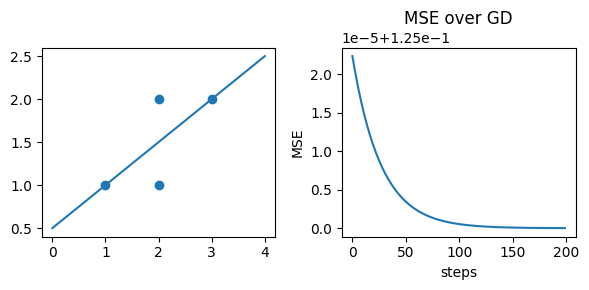

In [1170]:
xp = np.linspace(0,4,10)
fx = w[0]*xp + w[1]

plt.figure(figsize=(6,3))
plt.subplot(121)
plt.scatter(Φ[:,0], y)
plt.plot(xp, fx)

plt.subplot(122)
plt.plot(function_output)
plt.title('MSE over GD')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()


Question 3

In [1171]:
f = np.array([[1, 1, 1, 1],
              [8, 4, 2, 1],
              [3.375, 2.25, 1.5, 1],
              [27, 9, 3, 1]])

y = np.array([[1],
              [1],
              [0],
              [2]])

w = np.linalg.inv(f.T.dot(f)).dot(f.T).dot(y)

print(w)

[[ -2.33333333]
 [ 14.5       ]
 [-27.16666667]
 [ 16.        ]]


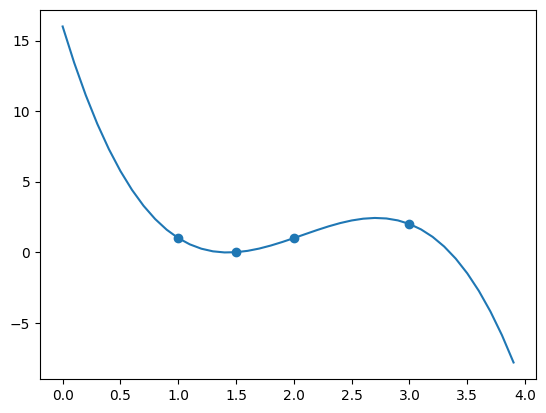

In [1172]:
x = np.reshape(np.arange(0,4, 0.1), (40,1))

f2 = np.hstack((x*x*x, x*x, x, np.ones((40,1))))

y_hat = f2.dot(w)

xy = np.array([[1, 1],
               [2, 1],
               [1.5, 0],
               [3, 2]])

plt.scatter(xy[:, 0], xy[:, 1])
plt.plot(x,y_hat)
plt.show()

Question 5

In [1173]:
# 1
def f(x, y):
    return y.T.dot(x).item()

def d_f(x, y):
    return y

auto_grad = grad(f)

y = np.array([[1],
              [2],
              [3]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x, y))
    print('Theoretical: ')
    print(d_f(x, y))
    print()

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]

Auto: 
[[1.]
 [2.]
 [3.]]
Theoretical: 
[[1]
 [2]
 [3]]



In [1174]:
# 2
def f(x, A):
    return x.T @ A @ x

def d_f(x, A):
    return (A.T + A) @ x

auto_grad = grad(f)

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x, A))
    print('Theoretical: ')
    print(d_f(x, A))
    print()

Auto: 
[[ 1.4121585 ]
 [-1.26930881]
 [-3.95077613]]
Theoretical: 
[[ 1.4121585 ]
 [-1.26930881]
 [-3.95077613]]

Auto: 
[[ -7.59692498]
 [-14.32603262]
 [-21.05514027]]
Theoretical: 
[[ -7.59692498]
 [-14.32603262]
 [-21.05514027]]

Auto: 
[[-14.48917721]
 [-32.02668584]
 [-49.56419448]]
Theoretical: 
[[-14.48917721]
 [-32.02668584]
 [-49.56419448]]

Auto: 
[[ 8.67036637]
 [17.94963175]
 [27.22889713]]
Theoretical: 
[[ 8.67036637]
 [17.94963175]
 [27.22889713]]

Auto: 
[[14.68757909]
 [17.66563332]
 [20.64368756]]
Theoretical: 
[[14.68757909]
 [17.66563332]
 [20.64368756]]

Auto: 
[[ -8.4180857 ]
 [-13.12488414]
 [-17.83168259]]
Theoretical: 
[[ -8.4180857 ]
 [-13.12488414]
 [-17.83168259]]

Auto: 
[[ 9.66467485]
 [11.68793899]
 [13.71120312]]
Theoretical: 
[[ 9.66467485]
 [11.68793899]
 [13.71120312]]

Auto: 
[[11.59056619]
 [19.42575313]
 [27.26094008]]
Theoretical: 
[[11.59056619]
 [19.42575313]
 [27.26094008]]

Auto: 
[[17.74467513]
 [23.71187478]
 [29.67907443]]
Theoretical: 
[[1

In [1175]:
# 3
def f(x):
    return trace(x.T @ A @ x)

def d_f(x):
    return (A.T + A) @ x

auto_grad = grad(f)

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[7.14663132]
 [5.86296702]
 [4.57930273]]
Theoretical: 
[[7.14663132]
 [5.86296702]
 [4.57930273]]

Auto: 
[[-16.03873551]
 [-24.3991072 ]
 [-32.75947888]]
Theoretical: 
[[-16.03873551]
 [-24.3991072 ]
 [-32.75947888]]

Auto: 
[[1.16320512]
 [2.30520841]
 [3.4472117 ]]
Theoretical: 
[[1.16320512]
 [2.30520841]
 [3.4472117 ]]

Auto: 
[[-12.53433658]
 [-17.94058659]
 [-23.3468366 ]]
Theoretical: 
[[-12.53433658]
 [-17.94058659]
 [-23.3468366 ]]

Auto: 
[[-0.33223857]
 [-0.46968873]
 [-0.60713888]]
Theoretical: 
[[-0.33223857]
 [-0.46968873]
 [-0.60713888]]

Auto: 
[[ -4.42139341]
 [-10.74653724]
 [-17.07168107]]
Theoretical: 
[[ -4.42139341]
 [-10.74653724]
 [-17.07168107]]

Auto: 
[[-10.27930559]
 [-16.4795149 ]
 [-22.67972422]]
Theoretical: 
[[-10.27930559]
 [-16.4795149 ]
 [-22.67972422]]

Auto: 
[[ -9.48115958]
 [-14.63186166]
 [-19.78256374]]
Theoretical: 
[[ -9.48115958]
 [-14.63186166]
 [-19.78256374]]

Auto: 
[[15.96260583]
 [24.81289561]
 [33.66318538]]
Theoretical: 
[[1

In [1176]:
# 4
def f(w, x):
    v = np.dot(np.transpose(w), x)
    return np.maximum(0, v)

def d_f(w, x):
    if w.T.dot(x) > 0:
        return x
    else:
        return 0

auto_grad = grad(f)

w = np.random.randn(2, 1)
x = np.random.randn(2, 1)
print(x)
print(auto_grad(w, x))
print(d_f(w, x))


'''
for i in range(10):
    w = np.random.randn(3, 1)
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x, w))
    print('Theoretical: ')
    print(d_f(x, w))
    print()
'''

[[0.4010919 ]
 [1.00193496]]
[[0.4010919 ]
 [1.00193496]]
[[0.4010919 ]
 [1.00193496]]


"\nfor i in range(10):\n    w = np.random.randn(3, 1)\n    x = np.random.randn(3, 1)\n    print('Auto: ')\n    print(auto_grad(x, w))\n    print('Theoretical: ')\n    print(d_f(x, w))\n    print()\n"

In [1177]:
# 5
def f(w, x, y):
    n = y.shape[0]
    total = 0
    for i in range(n):
        total += (1 / n) * ((np.dot(w.T, x[i]) - y[i]) ** 2)
    return total

def d_f(w, x, y):
    n = y.shape[0]
    total = 0
    for i in range(n):
        total += (2 / n) * (np.dot(w.T, x[i]) - y[i]) * x[i]
    return total

auto_grad = grad(f)

for i in range(10):
    x = np.random.randn(3, 2)
    y = np.random.randn(3)
    w = np.random.randn(2)
    print("Auto: ")
    print(auto_grad(w, x, y))
    print("Theoretical: ")
    print(d_f(w, x, y))
    print()

Auto: 
[-0.24549858  1.272215  ]
Theoretical: 
[-0.24549858  1.272215  ]

Auto: 
[-0.29663124 -0.47693957]
Theoretical: 
[-0.29663124 -0.47693957]

Auto: 
[-0.1777237  -1.31715568]
Theoretical: 
[-0.1777237  -1.31715568]

Auto: 
[-0.02798281  4.48401437]
Theoretical: 
[-0.02798281  4.48401437]

Auto: 
[0.52943934 4.7742415 ]
Theoretical: 
[0.52943934 4.7742415 ]

Auto: 
[2.44683609 3.24915915]
Theoretical: 
[2.44683609 3.24915915]

Auto: 
[2.62538989 1.36333407]
Theoretical: 
[2.62538989 1.36333407]

Auto: 
[ 1.30558499 -1.78398301]
Theoretical: 
[ 1.30558499 -1.78398301]

Auto: 
[1.1829411  0.25674433]
Theoretical: 
[1.1829411  0.25674433]

Auto: 
[-3.24556919 -0.95454682]
Theoretical: 
[-3.24556919 -0.95454682]



In [1178]:
# 6
def f(x):
    return exp(-trace(x.T @ A @ x))

def d_f(x):
    return -exp(-trace(x.T @ A @ x)) * (A.T + A) @ x

auto_grad = grad(f)

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[-9.32701836e-07]
 [-1.45567632e-06]
 [-1.97865081e-06]]
Theoretical: 
[[-9.32701836e-07]
 [-1.45567632e-06]
 [-1.97865081e-06]]

Auto: 
[[2.12031833e-38]
 [3.43746596e-38]
 [4.75461359e-38]]
Theoretical: 
[[2.12031833e-38]
 [3.43746596e-38]
 [4.75461359e-38]]

Auto: 
[[9.38966996]
 [6.62478888]
 [3.85990781]]
Theoretical: 
[[9.38966996]
 [6.62478888]
 [3.85990781]]

Auto: 
[[-0.08374346]
 [-0.28209282]
 [-0.48044219]]
Theoretical: 
[[-0.08374346]
 [-0.28209282]
 [-0.48044219]]

Auto: 
[[3.64447115e-07]
 [5.94300085e-07]
 [8.24153054e-07]]
Theoretical: 
[[3.64447115e-07]
 [5.94300085e-07]
 [8.24153054e-07]]

Auto: 
[[-3.65365783e-24]
 [-6.06593213e-24]
 [-8.47820642e-24]]
Theoretical: 
[[-3.65365783e-24]
 [-6.06593213e-24]
 [-8.47820642e-24]]

Auto: 
[[-78.02567526]
 [-51.81215263]
 [-25.59863   ]]
Theoretical: 
[[-78.02567526]
 [-51.81215263]
 [-25.59863   ]]

Auto: 
[[3.48786770e-21]
 [4.80481822e-21]
 [6.12176873e-21]]
Theoretical: 
[[3.48786770e-21]
 [4.80481822e-21]
 [6.12

In [1179]:
# 7
def f(x):
    return exp(-(x.T @ A @ x))

def d_f(x):
    return -exp(-(x.T @ A @ x)) * (A.T + A) @ x

auto_grad = grad(f)

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[-0.34488451]
 [-1.00232567]
 [-1.65976682]]
Theoretical: 
[[-0.34488451]
 [-1.00232567]
 [-1.65976682]]

Auto: 
[[-0.00020902]
 [-0.0005813 ]
 [-0.00095358]]
Theoretical: 
[[-0.00020902]
 [-0.0005813 ]
 [-0.00095358]]

Auto: 
[[-1.03185661e-39]
 [-1.58136680e-39]
 [-2.13087699e-39]]
Theoretical: 
[[-1.03185661e-39]
 [-1.58136680e-39]
 [-2.13087699e-39]]

Auto: 
[[5.01933437e-12]
 [8.31903774e-12]
 [1.16187411e-11]]
Theoretical: 
[[5.01933437e-12]
 [8.31903774e-12]
 [1.16187411e-11]]

Auto: 
[[-0.00022748]
 [-0.00029295]
 [-0.00035842]]
Theoretical: 
[[-0.00022748]
 [-0.00029295]
 [-0.00035842]]

Auto: 
[[-0.46577507]
 [-0.50986826]
 [-0.55396146]]
Theoretical: 
[[-0.46577507]
 [-0.50986826]
 [-0.55396146]]

Auto: 
[[-0.06672574]
 [-0.13729367]
 [-0.2078616 ]]
Theoretical: 
[[-0.06672574]
 [-0.13729367]
 [-0.2078616 ]]

Auto: 
[[ 413.24097923]
 [  32.03667821]
 [-349.16762281]]
Theoretical: 
[[ 413.24097923]
 [  32.03667821]
 [-349.16762281]]

Auto: 
[[-8.13604063e-17]
 [-1.400

In [1180]:
# 8
def f(x):
    return 1 / (1 + exp(-x))

def d_f(x):
    return (1 / (1 + exp(-x))) * (1 - (1 / (1 + exp(-x))))

auto_grad = elementwise_grad(f)

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[0.17432675]
 [0.07252425]
 [0.23763112]]
Theoretical: 
[[0.17432675]
 [0.07252425]
 [0.23763112]]

Auto: 
[[0.228193  ]
 [0.1794598 ]
 [0.24982113]]
Theoretical: 
[[0.228193  ]
 [0.1794598 ]
 [0.24982113]]

Auto: 
[[0.21513658]
 [0.24999965]
 [0.18608263]]
Theoretical: 
[[0.21513658]
 [0.24999965]
 [0.18608263]]

Auto: 
[[0.24740578]
 [0.20176028]
 [0.23062369]]
Theoretical: 
[[0.24740578]
 [0.20176028]
 [0.23062369]]

Auto: 
[[0.21801245]
 [0.24293872]
 [0.22115475]]
Theoretical: 
[[0.21801245]
 [0.24293872]
 [0.22115475]]

Auto: 
[[0.23424001]
 [0.2007359 ]
 [0.22305782]]
Theoretical: 
[[0.23424001]
 [0.2007359 ]
 [0.22305782]]

Auto: 
[[0.22737227]
 [0.23813962]
 [0.24968475]]
Theoretical: 
[[0.22737227]
 [0.23813962]
 [0.24968475]]

Auto: 
[[0.19924523]
 [0.2383321 ]
 [0.24708653]]
Theoretical: 
[[0.19924523]
 [0.2383321 ]
 [0.24708653]]

Auto: 
[[0.21082776]
 [0.24137611]
 [0.21140607]]
Theoretical: 
[[0.21082776]
 [0.24137611]
 [0.21140607]]

Auto: 
[[0.20259193]
 [0.227

In [1181]:
# 9
def f(w, x):
    return 1 / (1 + np.exp(-np.dot(w.T, x)))

def d_f(w, x):
    return np.dot(x, np.exp(-1 * np.dot(w.T, x))) / ((1 + np.exp((-1 * np.dot(w.T, x)))) ** 2)

auto_grad = grad(f)

for i in range(10):
    w = np.random.randn(3, 1)
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(w, x))
    print('Theoretical: ')
    print(d_f(w, x))
    print()

Auto: 
[[ 0.19765184]
 [ 0.12597666]
 [-0.18190324]]
Theoretical: 
[[ 0.19765184]
 [ 0.12597666]
 [-0.18190324]]

Auto: 
[[-0.96802525]
 [ 0.38676105]
 [ 0.26301366]]
Theoretical: 
[[-0.96802525]
 [ 0.38676105]
 [ 0.26301366]]

Auto: 
[[-0.00198157]
 [ 0.01889416]
 [-0.20356895]]
Theoretical: 
[[-0.00198157]
 [ 0.01889416]
 [-0.20356895]]

Auto: 
[[-0.06985876]
 [ 0.16047442]
 [ 0.09027721]]
Theoretical: 
[[-0.06985876]
 [ 0.16047442]
 [ 0.09027721]]

Auto: 
[[-0.08930238]
 [-0.20251635]
 [ 0.03072127]]
Theoretical: 
[[-0.08930238]
 [-0.20251635]
 [ 0.03072127]]

Auto: 
[[-0.11088705]
 [ 0.01293774]
 [-0.04770889]]
Theoretical: 
[[-0.11088705]
 [ 0.01293774]
 [-0.04770889]]

Auto: 
[[-0.31741259]
 [-0.33866212]
 [ 0.20469553]]
Theoretical: 
[[-0.31741259]
 [-0.33866212]
 [ 0.20469553]]

Auto: 
[[0.16343909]
 [0.15661452]
 [0.04157811]]
Theoretical: 
[[0.16343909]
 [0.15661452]
 [0.04157811]]

Auto: 
[[ 0.10728356]
 [ 0.13419328]
 [-0.07465013]]
Theoretical: 
[[ 0.10728356]
 [ 0.1341932

In [1182]:
# 10
def f(x):
    return np.sum(np.abs(x))

def d_f(x):
    return np.sign(x)

auto_grad = grad(f)


for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[ 1.]
 [ 1.]
 [-1.]]
Theoretical: 
[[ 1.]
 [ 1.]
 [-1.]]

Auto: 
[[-1.]
 [-1.]
 [-1.]]
Theoretical: 
[[-1.]
 [-1.]
 [-1.]]

Auto: 
[[ 1.]
 [-1.]
 [ 1.]]
Theoretical: 
[[ 1.]
 [-1.]
 [ 1.]]

Auto: 
[[-1.]
 [-1.]
 [-1.]]
Theoretical: 
[[-1.]
 [-1.]
 [-1.]]

Auto: 
[[1.]
 [1.]
 [1.]]
Theoretical: 
[[1.]
 [1.]
 [1.]]

Auto: 
[[ 1.]
 [ 1.]
 [-1.]]
Theoretical: 
[[ 1.]
 [ 1.]
 [-1.]]

Auto: 
[[-1.]
 [-1.]
 [ 1.]]
Theoretical: 
[[-1.]
 [-1.]
 [ 1.]]

Auto: 
[[-1.]
 [ 1.]
 [-1.]]
Theoretical: 
[[-1.]
 [ 1.]
 [-1.]]

Auto: 
[[ 1.]
 [-1.]
 [-1.]]
Theoretical: 
[[ 1.]
 [-1.]
 [-1.]]

Auto: 
[[ 1.]
 [ 1.]
 [-1.]]
Theoretical: 
[[ 1.]
 [ 1.]
 [-1.]]



In [1183]:
# 11
def f(x):
    return np.sqrt(np.sum(x ** 2))

def d_f(x):
    return x / np.sqrt(np.sum(x ** 2))

auto_grad = grad(f)

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x))
    print('Theoretical: ')
    print(d_f(x))
    print()

Auto: 
[[-0.68028115]
 [ 0.67640709]
 [-0.28229593]]
Theoretical: 
[[-0.68028115]
 [ 0.67640709]
 [-0.28229593]]

Auto: 
[[-0.27056883]
 [-0.77339662]
 [ 0.57328019]]
Theoretical: 
[[-0.27056883]
 [-0.77339662]
 [ 0.57328019]]

Auto: 
[[-0.17437131]
 [ 0.34273129]
 [ 0.92310883]]
Theoretical: 
[[-0.17437131]
 [ 0.34273129]
 [ 0.92310883]]

Auto: 
[[-4.30989834e-01]
 [ 9.02356759e-01]
 [-2.05017326e-04]]
Theoretical: 
[[-4.30989834e-01]
 [ 9.02356759e-01]
 [-2.05017326e-04]]

Auto: 
[[-0.83498423]
 [-0.19830245]
 [-0.51330057]]
Theoretical: 
[[-0.83498423]
 [-0.19830245]
 [-0.51330057]]

Auto: 
[[ 0.10538448]
 [-0.97455846]
 [ 0.19781283]]
Theoretical: 
[[ 0.10538448]
 [-0.97455846]
 [ 0.19781283]]

Auto: 
[[ 0.87106111]
 [-0.48432829]
 [-0.081723  ]]
Theoretical: 
[[ 0.87106111]
 [-0.48432829]
 [-0.081723  ]]

Auto: 
[[-0.50384251]
 [-0.21596436]
 [-0.83636243]]
Theoretical: 
[[-0.50384251]
 [-0.21596436]
 [-0.83636243]]

Auto: 
[[0.53866679]
 [0.68148558]
 [0.49539428]]
Theoretical: 


In [1184]:
# 13
def f(x, lambd):
    return x.T @ A @ x - lambd*(x.T @ x - 1)

def d_f(x, lambd):
    return (A.T + A) @ x - 2*lambd*x

auto_grad = grad(f)

lambd = np.random.rand()
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(x, lambd))
    print('Theoretical: ')
    print(d_f(x, lambd))
    print()

Auto: 
[[-18.74176809]
 [-22.36871237]
 [-26.20690657]]
Theoretical: 
[[-18.74176809]
 [-22.36871237]
 [-26.20690657]]

Auto: 
[[ -5.20095318]
 [-10.11431086]
 [-15.75693691]]
Theoretical: 
[[ -5.20095318]
 [-10.11431086]
 [-15.75693691]]

Auto: 
[[ 7.42722008]
 [18.14896807]
 [29.4209727 ]]
Theoretical: 
[[ 7.42722008]
 [18.14896807]
 [29.4209727 ]]

Auto: 
[[-0.59705001]
 [-0.22408875]
 [ 1.94562705]]
Theoretical: 
[[-0.59705001]
 [-0.22408875]
 [ 1.94562705]]

Auto: 
[[6.24682718]
 [4.02343292]
 [3.54545974]]
Theoretical: 
[[6.24682718]
 [4.02343292]
 [3.54545974]]

Auto: 
[[25.4336577 ]
 [44.66796708]
 [62.72343221]]
Theoretical: 
[[25.4336577 ]
 [44.66796708]
 [62.72343221]]

Auto: 
[[-2.46778553]
 [-2.73685798]
 [-5.08662471]]
Theoretical: 
[[-2.46778553]
 [-2.73685798]
 [-5.08662471]]

Auto: 
[[-13.55032099]
 [-15.73406543]
 [-16.82870854]]
Theoretical: 
[[-13.55032099]
 [-15.73406543]
 [-16.82870854]]

Auto: 
[[10.31174735]
 [25.29210448]
 [41.06164575]]
Theoretical: 
[[10.3117

In [1185]:
# 14
def f(mu, x, sig):
    n = x.shape[0]

    total = 0
    for i in range(n):
        total += -np.log(np.sqrt(2 * np.pi * sig ** 2)) - (x[i] - mu) ** 2 / (2 * sig ** 2)
    return total

def d_f(mu, x, sig):
    n = x.shape[0]

    total = 0
    for i in range(n):
        total += (x[i] - mu) / (sig ** 2)
    return total

auto_grad = grad(f)

mu = np.random.randn()
sig = np.abs(np.random.randn())

for i in range(10):
    x = np.random.randn(3, 1)
    print('Auto: ')
    print(auto_grad(mu, x, sig))
    print('Theoretical: ')
    print(d_f(mu, x, sig))
    print()

Auto: 
-4.325849047454522
Theoretical: 
[-4.32584905]

Auto: 
-1.2525522360103114
Theoretical: 
[-1.25255224]

Auto: 
-3.614306599820326
Theoretical: 
[-3.6143066]

Auto: 
-3.7200017618134407
Theoretical: 
[-3.72000176]

Auto: 
-5.96618594305256
Theoretical: 
[-5.96618594]

Auto: 
-6.752074565499559
Theoretical: 
[-6.75207457]

Auto: 
-2.841294159680572
Theoretical: 
[-2.84129416]

Auto: 
-2.4063128488981596
Theoretical: 
[-2.40631285]

Auto: 
-4.400689968676817
Theoretical: 
[-4.40068997]

Auto: 
-5.41112189033959
Theoretical: 
[-5.41112189]



In [1186]:
# 15
def f(lambd, x):
    n = x.shape[0]

    total = 0
    for i in range(n):
        total += np.log(lambd * np.exp(-lambd * x[i]))
    return total

def d_f(lambd, x):
    n = x.shape[0]

    total = 0
    for i in range(n):
        total += (1 / lambd) - x[i]
    return total

auto_grad = grad(f)

for i in range(10):
    lambd = np.abs(np.random.randn())
    x = np.random.randn(3, 1)
    print("Auto: ")
    print(auto_grad(lambd, x))
    print("Theoretical: ")
    print(d_f(lambd, x))
    print()

Auto: 
3.5858895570606197
Theoretical: 
[3.58588956]

Auto: 
21.125549261117477
Theoretical: 
[21.12554926]

Auto: 
242.0716204088873
Theoretical: 
[242.07162041]

Auto: 
23.689448707381622
Theoretical: 
[23.68944871]

Auto: 
26.712629631164333
Theoretical: 
[26.71262963]

Auto: 
5.56150600678534
Theoretical: 
[5.56150601]

Auto: 
0.4192282125793496
Theoretical: 
[0.41922821]

Auto: 
2.8584937520160563
Theoretical: 
[2.85849375]

Auto: 
2.985745137221388
Theoretical: 
[2.98574514]

Auto: 
15.081941968581072
Theoretical: 
[15.08194197]



In [1187]:
# 16
def f(p, a):
    n = a.shape[0]

    total = 0
    for i in range(n):
        total += a[i] * np.log(p) + ((1 - a[i]) * np.log(1 - p))
    return total

def d_f(p, a):
    n = a.shape[0]

    total = 0
    for i in range(n):
        total += (a[i] / p) - ((1 - a[i]) / (1 - p))
    return total

auto_grad = grad(f)

for i in range(10):
    p = np.random.random()
    a = np.random.randint(0, 2, 3)
    print('Auto: ')
    print(auto_grad(p, a))
    print('Theoretical: ')
    print(d_f(p, a))
    print()

Auto: 
-1.1150953748628112
Theoretical: 
-1.1150953748628112

Auto: 
228.80742560006152
Theoretical: 
228.80742560006152

Auto: 
0.6148618661751679
Theoretical: 
0.6148618661751679

Auto: 
3.688873021533097
Theoretical: 
3.688873021533097

Auto: 
-4.597198266158126
Theoretical: 
-4.597198266158126

Auto: 
-0.8499619092391004
Theoretical: 
-0.8499619092391004

Auto: 
-5.025192542899647
Theoretical: 
-5.025192542899647

Auto: 
-2.2228817230612705
Theoretical: 
-2.2228817230612705

Auto: 
-0.6161593487212662
Theoretical: 
-0.6161593487212662

Auto: 
0.3199605627218829
Theoretical: 
0.3199605627218829



In [1188]:
# 17
def f(a, b, x):
    n = x.shape[0]

    total = 0
    for i in range(n):
        total += np.log(1 / (b-a))
    return total

def d_f(a, b, x):
    n = x.shape[0]

    d_a = n / (b-a)
    d_b = -n / (b-a)
    return np.array([d_a, d_b])

auto_grad = grad(f)

for i in range(10):
    x = np.random.randn(5)
    a = np.random.randn()
    b = a + np.abs(np.random.randn())
    print('Auto: ')
    print(auto_grad(a, b, x))
    print('Theoretical: ')
    print(d_f(a, b, x))
    print()

Auto: 
14.057838009721294
Theoretical: 
[ 14.05783801 -14.05783801]

Auto: 
4.341106219399859
Theoretical: 
[ 4.34110622 -4.34110622]

Auto: 
2.0228529812284544
Theoretical: 
[ 2.02285298 -2.02285298]

Auto: 
4.4100573930023295
Theoretical: 
[ 4.41005739 -4.41005739]

Auto: 
23.896474348994616
Theoretical: 
[ 23.89647435 -23.89647435]

Auto: 
6.68529276194705
Theoretical: 
[ 6.68529276 -6.68529276]

Auto: 
7.887233838101414
Theoretical: 
[ 7.88723384 -7.88723384]

Auto: 
8.070830072750466
Theoretical: 
[ 8.07083007 -8.07083007]

Auto: 
7.1408814644398655
Theoretical: 
[ 7.14088146 -7.14088146]

Auto: 
60.90730540628469
Theoretical: 
[ 60.90730541 -60.90730541]



Question 6

In [1189]:
love = genfromtxt('hw_csv_file/time_with_loved_ones.csv', delimiter=',').reshape(-1, 1)
love.shape

(1000, 1)

In [1190]:
happy = genfromtxt('hw_csv_file/happiness_level.csv', delimiter=',').reshape(-1, 1)
happy.shape

(1000, 1)

In [1191]:
Φ = np.column_stack((love, np.ones_like(love)))

In [1192]:
n = Φ.shape[0]

In [1193]:
y = happy

In [1194]:
w = np.array([[0],[1]]) 
η = 0.001

In [1195]:
def f(w):
	fₒ = 0						# function output
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		fₒ += (w.T.dot(ϕᵢ) - yᵢ)**2
#	
	return ((1/n)*fₒ).item()

In [1196]:
def fᑊ(w):
	ᐁf = np.zeros((2,1))
	for ϕᵢ, yᵢ in zip(Φ,y):
		ϕᵢ = np.reshape(ϕᵢ, (2,1))
		ᐁf += (w.T.dot(ϕᵢ) - yᵢ)*ϕᵢ
	return (2/n)*ᐁf



In [1197]:
f_value_list = []
for i in range(1000):
	w = w - η*fᑊ(w)				# gradient descent update w
	f_value_list.append(f(w))


In [1198]:
print('Best w = \n', w)
print('Predictions: \n', Φ.dot(w))

Best w = 
 [[0.36662105]
 [0.74894018]]
Predictions: 
 [[4.77297288]
 [5.99308775]
 [5.168557  ]
 [4.74437644]
 [3.85532038]
 [5.48495097]
 [3.95760765]
 [7.2876267 ]
 [7.81482777]
 [3.56055705]
 [6.55438459]
 [4.6270577 ]
 [4.91412199]
 [7.53582915]
 [1.2699087 ]
 [1.38796068]
 [0.89705509]
 [6.85391399]
 [6.45466366]
 [7.12814654]
 [7.92444747]
 [6.6086445 ]
 [4.13285252]
 [6.47226147]
 [1.61599898]
 [5.44095644]
 [1.80004275]
 [7.67551177]
 [4.57536413]
 [3.78932859]
 [2.68873218]
 [6.42606722]
 [4.09362407]
 [4.91705495]
 [0.8867897 ]
 [5.27781007]
 [5.23711514]
 [5.27267738]
 [7.66891259]
 [5.74818489]
 [3.38494557]
 [3.95357482]
 [5.86440376]
 [1.19071855]
 [5.63783195]
 [5.66642839]
 [2.29168158]
 [1.69445588]
 [3.06195242]
 [3.41574173]
 [4.92988669]
 [3.96494008]
 [7.99593857]
 [1.49721375]
 [2.28068295]
 [1.9316597 ]
 [5.5377444 ]
 [2.60624245]
 [4.16804814]
 [2.54135052]
 [1.91442851]
 [1.55843947]
 [5.56157477]
 [1.76228078]
 [2.19049417]
 [3.45277046]
 [6.7688579 ]
 [1.460

In [1199]:
xp = np.linspace(0,20,100)
fₓ = w[0]*xp + w[1]

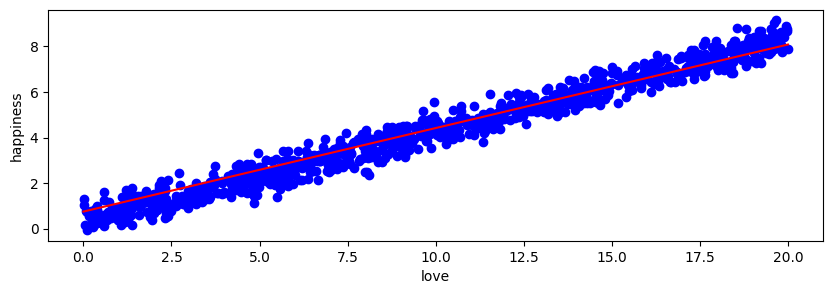

In [1200]:
plt.figure(figsize=(10,3))
plt.scatter(Φ[:,0], y, color='blue')
plt.plot(xp, fₓ, color='red')
plt.xlabel('love')
plt.ylabel('happiness')
plt.show()

In [1201]:
print(w[0]*15 + w[1])

# you would have a hapiness of 6.2 according to my model

[6.24825601]
